In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


### ***Checking for *missing values(null)****

In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
df = df.dropna()

In [15]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [16]:
df.isnull().sum()

label     0
review    0
dtype: int64

### **Check if there are rows with empty text('', ' ', ...)**

In [50]:
df[df['review'].str.strip() == '']

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [52]:
df = df[df['review'].str.strip() != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


### **Number of rows per label**

In [57]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

### **EDA** ****of Bag of words**** 

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [126]:
pos = df[df['label'] == 'pos']
pos.head()

,label,review
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
11,pos,"with stars like sigourney weaver ( "" alien "" t..."
16,pos,i remember hearing about this film when it fir...
18,pos,garry shandling makes his long overdue starrin...


In [180]:
ps = pos['review'].transform(lambda x: x.lower().strip())
ps.head()

2     this has been an extraordinary year for austra...
3     according to hollywood movies made in last few...
11    with stars like sigourney weaver ( " alien " t...
16    i remember hearing about this film when it fir...
18    garry shandling makes his long overdue starrin...
Name: review, dtype: object

In [132]:
neg = df[df['label'] == 'neg']
neg.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."


In [136]:
ng = neg['review'].transform(lambda x: x.lower().strip())
ng.head()

0    how do films like mouse hunt get into theatres...
1    some talented actresses are blessed with a dem...
4    my first press screening of 1998 and already i...
5    to put it bluntly , ed wood would have been pr...
6    synopsis : melissa , a mentally-disturbed woma...
Name: review, dtype: object

In [152]:
from collections import Counter

In [184]:
cv_pos = CountVectorizer(stop_words='english')
ps_res = cv_pos.fit_transform(ps)

In [227]:
ordered_words = {key: v for key, v in sorted(cv_pos.vocabulary_.items(), key=lambda item: item[1])}
#ordered_words

In [199]:
# Create DataFrame for positive reviews
ps_df = pd.DataFrame(data=ps_res.todense(), columns=ordered_words)
ps_df.head()

,00,000,0009f,007,05,10,100,1000,10000,100m,...,zuehlke,zuko,zukovsky,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
# Summing word counts for positive reviews
top_pos = ps_df.sum().sort_values(ascending=False)[:20]
print('Top 20 words in positive reviews:\n', top_pos)

Top 20 words in positive reviews:
 film          5002
movie         2389
like          1721
just          1273
story         1199
good          1193
time          1175
character     1037
life          1032
characters     957
way            864
films          851
does           828
best           788
people         769
make           764
little         751
really         731
man            728
new            702
dtype: int64


In [228]:
cv_neg = CountVectorizer(stop_words='english')
ng_res = cv_neg.fit_transform(ng)

In [230]:
cv_pos.fixed_vocabulary_
ordered_words_neg = {k: v for k, v in sorted(cv_neg.vocabulary_.items(), key=lambda item: item[1])}
#ordered_words_neg

In [232]:
ng_df = pd.DataFrame(data=ng_res.todense(), columns=ordered_words_neg)
#ng_df.head()

In [234]:
top_neg = ng_df.sum().sort_values(ascending=False)[:20]
print('Top 20 words in negative reviews:\n', top_neg)

Top 20 words in negative reviews:
 film          4063
movie         3131
like          1808
just          1480
time          1127
good          1117
bad            997
character      926
story          908
plot           888
characters     838
make           813
really         743
way            734
little         696
don            683
does           666
doesn          648
action         635
scene          634
dtype: int64


### ****Data Splitting****

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.2, random_state=101)

## **Model Fitting**

#### **Creation of PIPELINE that containt 'Term Frequency - Inverse Document Frequency' and 'GridSearchCV'**

#### **Naive Bayes: MultinomialNB, BernoulliNB, ComplementNB**

#### **LinearSVC, SVC**

#### **Logistic Regression**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import FunctionTransformer

In [361]:
tfidf = TfidfVectorizer(stop_words='english')

In [379]:
pipe_cnb = Pipeline([('tfidf', tfidf),
                     ('Grid', GridSearchCV(ComplementNB(),
                                          param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]},
                                          cv=5,
                                          verbose=2))
                    ])

In [380]:
pipe_cnb.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ........................................

,steps,"[('tfidf', ...), ('Grid', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [374]:
pipe_bnb = Pipeline([('tfidf', tfidf),
                     ('GridNB', GridSearchCV(BernoulliNB(),
                                            param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]},
                                            cv=5,
                                            verbose=2))
                    ])

In [375]:
pipe_bnb.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ........................................

,steps,"[('tfidf', ...), ('GridNB', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [321]:
pipe_nb = Pipeline([('tfidf', tfidf),
                    ('GridNB', GridSearchCV(MultinomialNB(),
                                            param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
                                            cv=5,
                                            verbose=2))
                   ])

In [322]:
pipe_nb.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ........................................

,steps,"[('tfidf', ...), ('GridNB', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
pipe_svc = Pipeline([('tfidf', tfidf), 
                 ('GridSVC',  GridSearchCV(SVC(),  
                                            param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                                                        'degree': [2, 3, 4, 5, 6],
                                                        'kernel':['linear','rbf']}, 
                                            cv=5, 
                                            verbose=2)
                )])

In [ ]:
pipe_svc.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END ...................C=0.001, degree=2, kernel=linear; total time=   3.2s
[CV] END ...................C=0.001, degree=2, kernel=linear; total time=   3.2s
[CV] END ...................C=0.001, degree=2, kernel=linear; total time=   3.3s
[CV] END ...................C=0.001, degree=2, kernel=linear; total time=   3.2s
[CV] END ...................C=0.001, degree=2, kernel=linear; total time=   3.3s
[CV] END ......................C=0.001, degree=2, kernel=rbf; total time=   4.6s
[CV] END ......................C=0.001, degree=2, kernel=rbf; total time=   4.8s
[CV] END ......................C=0.001, degree=2, kernel=rbf; total time=   3.0s
[CV] END ......................C=0.001, degree=2, kernel=rbf; total time=   3.2s
[CV] END ......................C=0.001, degree=2, kernel=rbf; total time=   3.2s
[CV] END ...................C=0.001, degree=3, kernel=linear; total time=   4.8s
[CV] END ...................C=0.001, degree=3, 

,steps,"[('tfidf', ...), ('GridSVC', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [330]:
pipe_linear_svc = Pipeline([('tfidf', tfidf), ('Grid', GridSearchCV(LinearSVC(),
                                                            param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
                                                            cv=5,
                                                            verbose=2))])

In [331]:
pipe_linear_svc.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................................C=100; total time=   0.3s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..............................................C=100; total time=   0.3s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.1s
[CV] END ..............................................C=100; total time=   0.3s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('tfidf', ...), ('Grid', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [392]:
from sklearn.linear_model import LogisticRegression

In [393]:
pipe_lr = Pipeline([('tfidf', tfidf), 
                            ('Grid', GridSearchCV(LogisticRegression(max_iter=1000), 
                                                  param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                                                            'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                                                            'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
                                                  cv=5,
                                                  verbose=2))])
                                                                

In [394]:
pipe_lr.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   7.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=  11.9s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=  10.9s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=  11.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=  12.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......................C=10, penalty=l2, solver=sag; total time=   0.1s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   8.2s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=  17.2s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   8.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   8.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   8.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=100, penalty=l2, solver=sag; total time=   0.2s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-package

,steps,"[('tfidf', ...), ('Grid', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


### **Model Assessment via "classification_report" and "ConfusionMatrixDisply" methods**

In [287]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
# defining function for fast reporting
def report(model):
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



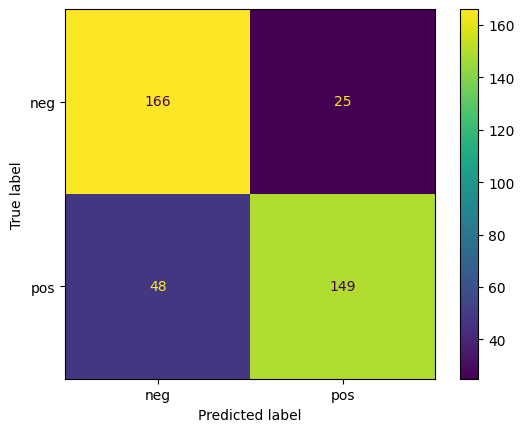

In [ ]:
#Complement NB
# report(pipe_cnb)

              precision    recall  f1-score   support

         neg       0.76      0.89      0.82       191
         pos       0.87      0.73      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



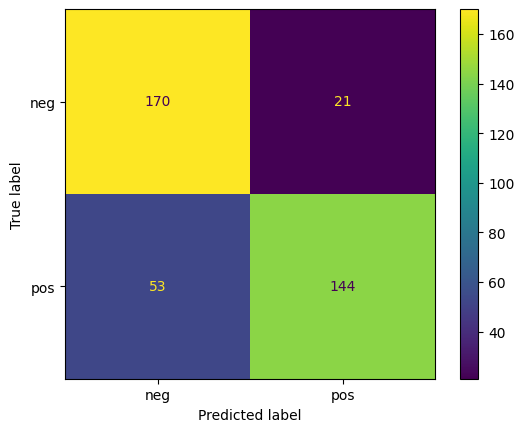

In [ ]:
#Bernoulli NB
report(pipe_bnb)

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



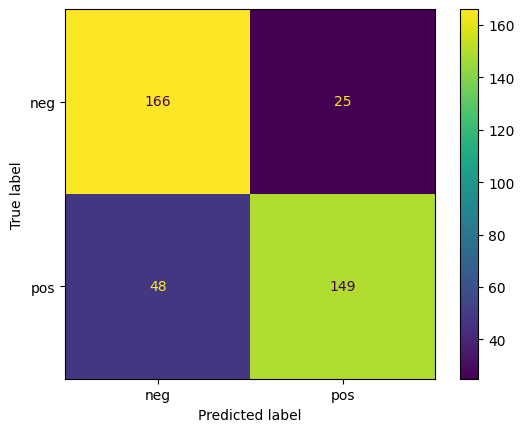

In [ ]:
#Multinomial NB
report(pipe_nb)

              precision    recall  f1-score   support

         neg       0.82      0.82      0.82       191
         pos       0.83      0.83      0.83       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



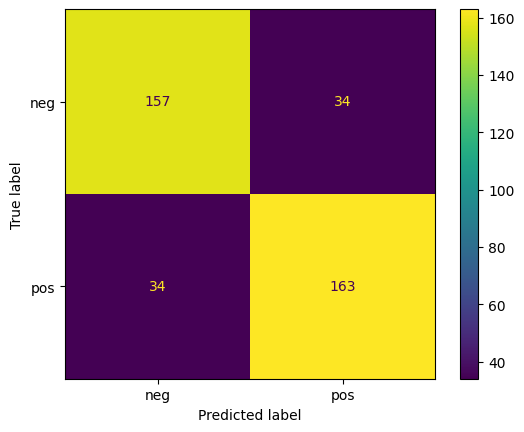

In [ ]:
#SVC
report(pipe_svc)

              precision    recall  f1-score   support

         neg       0.82      0.83      0.82       191
         pos       0.83      0.82      0.83       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



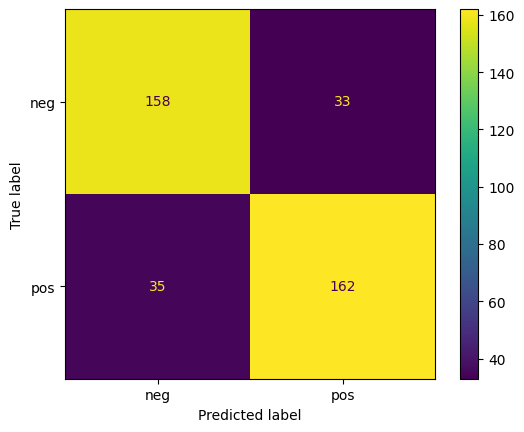

In [ ]:
#Linear SVC
report(pipe_linear_svc)

              precision    recall  f1-score   support

         neg       0.82      0.84      0.83       191
         pos       0.84      0.82      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



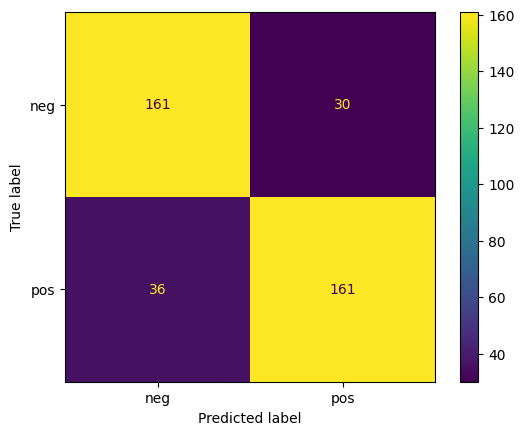

In [ ]:
#Logistic Regression
report(pipe_lr)